In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score

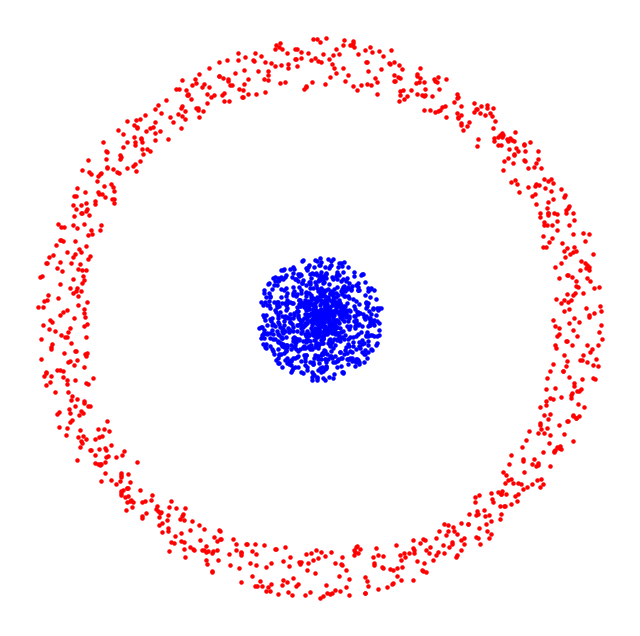

In [ ]:
def draw_circle(x_center, y_center, radius, color, num_points):
  """
  Рисует круг с помощью точек.
  Args:
    x_center: Координата x центра круга.
    y_center: Координата y центра круга.
    radius: Радиус круга.
    color: Цвет круга.
    num_points: Количество точек для рисования круга.
  """
  angles = [2 * i * 3.14159 / num_points for i in range(num_points)]
  x_points = [x_center + radius * random.uniform(0.9, 1.1) * np.cos(angle) for angle in angles]
  y_points = [y_center + radius * random.uniform(0.9, 1.1) * np.sin(angle) for angle in angles]
  plt.scatter(x_points, y_points, color=color, s=5)

def draw_circles(inner_radius, outer_radius, color1, color2, num_points1, num_points2):
  """
  Рисует два круга, один внутри другого.
  Args:
    inner_radius: Радиус внутреннего круга.
    outer_radius: Радиус внешнего круга.
    color1: Цвет внутреннего круга.
    color2: Цвет внешнего круга.
    num_points1: Количество точек для внутреннего круга.
    num_points2: Количество точек для внешнего круга.
  """
  plt.figure(figsize=(8, 8))

  # Рисуем внешний круг
  outer_radius_expanded = outer_radius * 1.5  # Задаём радиус
  num_points2 = 1000  # количество точек внешнего круга
  draw_circle(0, 0, outer_radius_expanded, color2, num_points2)

  # Рисуем внутренний круг с заполнением
  x_inner = []
  y_inner = []
  for _ in range(num_points1):
    angle = random.uniform(0, 2 * np.pi)
    r = random.uniform(0, inner_radius)  # Случайный радиус для заполнения
    x_inner.append(r * np.cos(angle))
    y_inner.append(r * np.sin(angle))
  plt.scatter(x_inner, y_inner, color=color1, s=5)

  plt.axis('off')
  plt.show()

# Настройка параметров кругов
inner_radius = 2
outer_radius = 5.5  # Настройка ширины круга
color1 = 'blue'
color2 = 'red'
num_points1 = 1000  # Количество точек для заполнения внутреннего круга
num_points2 = 1000  # Количество точек внешнего круга

# Рисование кругов
draw_circles(inner_radius, outer_radius, color1, color2, num_points1, num_points2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rand Index для K-средних: 0.5875742871435717
Rand Index для DBSCAN: 1.0
Rand Index для Gaussian Mixtures: 0.5292891445722862


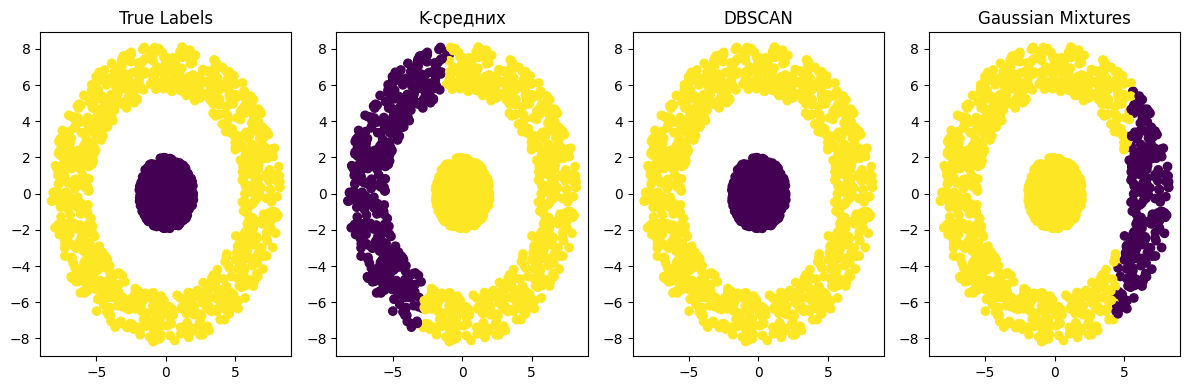

In [ ]:
def generate_data_A(inner_radius, outer_radius, num_points1, num_points2):
  """
  Генерирует тестовые данные для кластеризации:
    - Внутренний круг: num_points1 точек, цвет - синий
    - Внешний круг: num_points2 точек, цвет - красный
  """
  x_inner = []
  y_inner = []
  for _ in range(num_points1):
    angle = random.uniform(0, 2 * np.pi)
    r = random.uniform(0, inner_radius)
    x_inner.append(r * np.cos(angle))
    y_inner.append(r * np.sin(angle))

  x_outer = []
  y_outer = []
  for _ in range(num_points2):
    angle = random.uniform(0, 2 * np.pi)
    r = random.uniform(outer_radius, outer_radius * 1.5)
    x_outer.append(r * np.cos(angle))
    y_outer.append(r * np.sin(angle))

  X = np.array([[x, y] for x, y in zip(x_inner + x_outer, y_inner + y_outer)])
  y_true = np.array([0] * num_points1 + [1] * num_points2)  # Истинные метки кластеров

  return X, y_true


# Генерация тестовых данных
X, y_true = generate_data_A(inner_radius, outer_radius, num_points1, num_points2)

# К-средних
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 кластера
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_
rand_index_kmeans = rand_score(y_true, y_pred_kmeans)
print(f"Rand Index для K-средних: {rand_index_kmeans}")

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)  # Подбор гиперпараметров
dbscan.fit(X)
y_pred_dbscan = dbscan.labels_
rand_index_dbscan = rand_score(y_true, y_pred_dbscan)
print(f"Rand Index для DBSCAN: {rand_index_dbscan}")

# Gaussian Mixtures
gmm = GaussianMixture(n_components=2, random_state=42)  # 2 компоненты смеси
gmm.fit(X)
y_pred_gmm = gmm.predict(X)
rand_index_gmm = rand_score(y_true, y_pred_gmm)
print(f"Rand Index для Gaussian Mixtures: {rand_index_gmm}")


# Визуализация
plt.figure(figsize=(12, 4))

# True Labels
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title('True Labels')

# K-средних
plt.subplot(1, 4, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, cmap='viridis')
plt.title('K-средних')

# DBSCAN
plt.subplot(1, 4, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_dbscan, cmap='viridis')
plt.title('DBSCAN')

# Gaussian Mixtures
plt.subplot(1, 4, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm, cmap='viridis')
plt.title('Gaussian Mixtures')

plt.tight_layout()
plt.show()

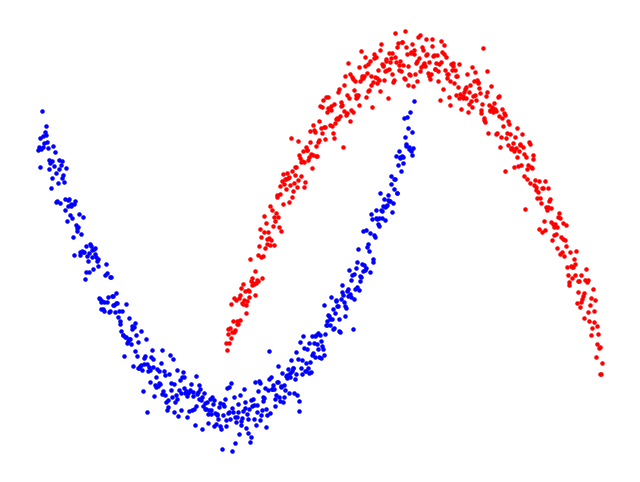

In [ ]:
def B(b1 = 0, b2 = 3, c1 = 0, c2 = 11, xl1 = -3, xl2 = 0, yl1 = 3, yl2 = 6):

  # Параметры для парабол:
  # Высота ветвей, большие значения сломают фигуру
  a1 = 1
  a2 = -1

  # b1 = 0
  # b2 = 3  # Сдвиг второй параболы вправо
  # c1 = 0
  # c2 = 11  # Сдвиг второй параболы вверх

  # Диапазон для случайных точек
  x_range = (-7, 7)
  y_range = (-6, 14)

  # Ограничение длинны ветвей
  x1_range = (xl1, yl1)  # Диапазон x для первой параболы
  x2_range = (xl2, yl2)  # Диапазон x для второй параболы

  # Генерация случайных точек для первой параболы
  x1 = np.linspace(x1_range[0], x1_range[1], 500)
  y1 = a1 * (x1 - b1) ** 2 + c1
  noise_y1 = np.random.normal(0, 0.5, len(x1))
  y1_noise = y1 + noise_y1

  # Генерация случайных точек для второй параболы
  x2 = np.linspace(x2_range[0], x2_range[1], 500)
  y2 = a2 * (x2 - b2) ** 2 + c2
  noise_y2 = np.random.normal(0, 0.5, len(x2))
  y2_noise = y2 + noise_y2

  # Отрисовка парабол
  plt.figure(figsize=(8, 6))
  plt.scatter(x1, y1_noise, s=5, c='blue', label='Парабола 1')
  plt.scatter(x2, y2_noise, s=5, c='red', label='Парабола 2')

  plt.axis('off')
  plt.show()


B(b1 = 0, b2 = 3, c1 = 0, c2 = 11, xl1 = -3, xl2 = 0, yl1 = 3, yl2 = 6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rand index (KMeans): 0.7122642642642643
Rand index (DBSCAN): 0.4994994994994995
Rand index (Gaussian Mixtures): 0.7377877877877878


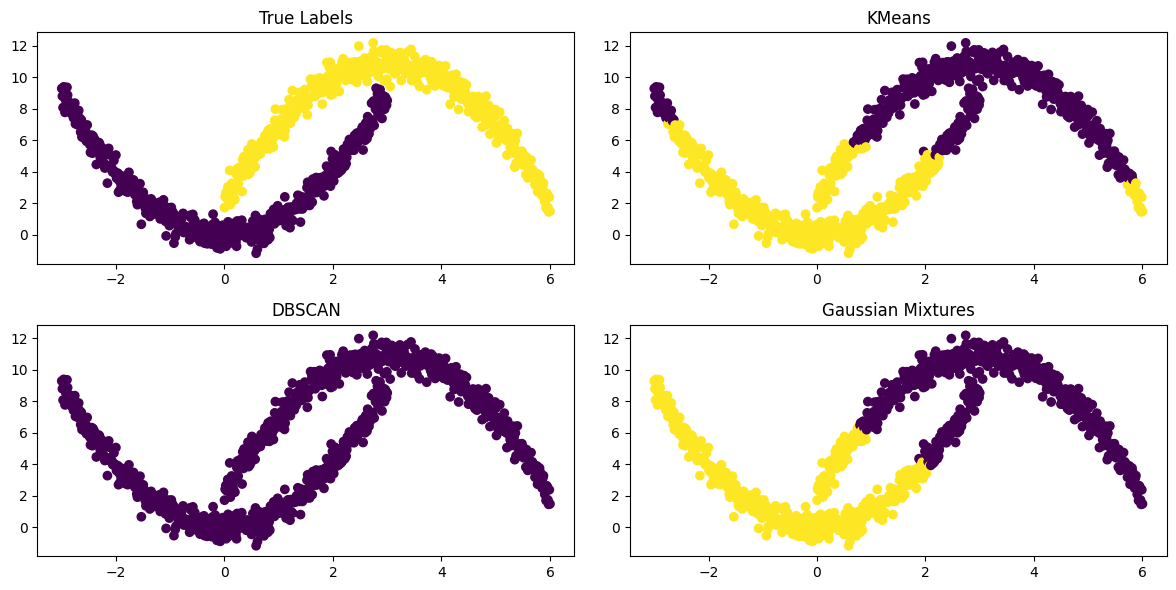

In [ ]:
def generate_data_B(b1 = 0, b2 = 3, c1 = 0, c2 = 11, xl1 = -3, xl2 = 0, yl1 = 3, yl2 = 6):

  # Параметры для парабол:
  # Высота ветвей, большие значения сломают фигуру
  a1 = 1
  a2 = -1

  # Диапазон для случайных точек
  x_range = (-7, 7)
  y_range = (-6, 14)

  # Ограничение длинны ветвей
  x1_range = (xl1, yl1)  # Диапазон x для первой параболы
  x2_range = (xl2, yl2)  # Диапазон x для второй параболы

  # Генерация случайных точек для первой параболы
  x1 = np.linspace(x1_range[0], x1_range[1], 500)
  y1 = a1 * (x1 - b1) ** 2 + c1
  noise_y1 = np.random.normal(0, 0.5, len(x1))
  y1_noise = y1 + noise_y1

  # Генерация случайных точек для второй параболы
  x2 = np.linspace(x2_range[0], x2_range[1], 500)
  y2 = a2 * (x2 - b2) ** 2 + c2
  noise_y2 = np.random.normal(0, 0.5, len(x2))
  y2_noise = y2 + noise_y2

  # Объединяем данные
  data = np.concatenate((np.column_stack((x1, y1_noise)), np.column_stack((x2, y2_noise))))
  # Истинные метки (0 - первая парабола, 1 - вторая парабола)
  true_labels = np.array([0] * len(x1) + [1] * len(x2))

  return data, true_labels


# Генерация данных и кластеризация
data, true_labels = generate_data_B()

# К-средних
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
rand_index_kmeans = rand_score(true_labels, kmeans.labels_)
print("Rand index (KMeans):", rand_index_kmeans)

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(data)
rand_index_dbscan = rand_score(true_labels, dbscan.labels_)
print("Rand index (DBSCAN):", rand_index_dbscan)

# Gaussian mixtures
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data)
rand_index_gmm = rand_score(true_labels, gmm.predict(data))
print("Rand index (Gaussian Mixtures):", rand_index_gmm)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Истинные метки
plt.subplot(2, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis')
plt.title("True Labels")

# KMeans
plt.subplot(2, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans")

# DBSCAN
plt.subplot(2, 2, 3)
plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title("DBSCAN")

# Gaussian Mixtures
plt.subplot(2, 2, 4)
plt.scatter(data[:, 0], data[:, 1], c=gmm.predict(data), cmap='viridis')
plt.title("Gaussian Mixtures")

plt.tight_layout()
plt.show()

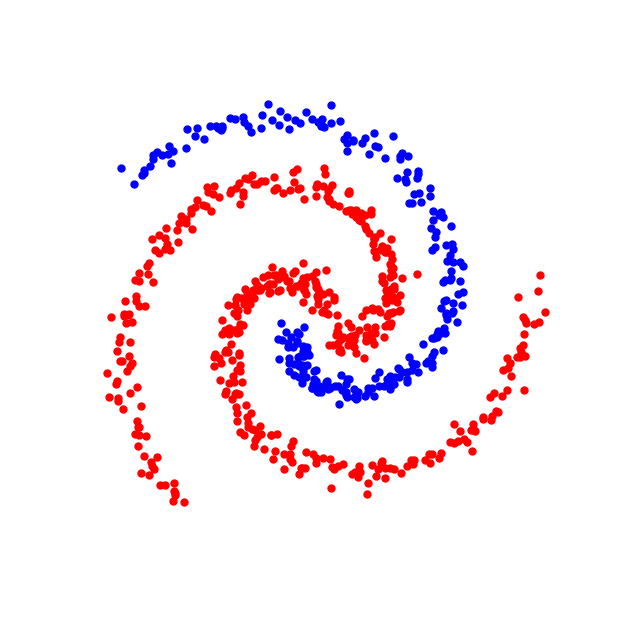

In [ ]:
def C(xlim1 = -1.2, xlim2 = 1.2, ylim1 = -1.2, ylim2 = 1.2):

  # Установка параметров для графика
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.set_aspect('equal')
  ax.set_xlim(xlim1, xlim2) # сдвиг по оси Х
  ax.set_ylim(ylim1, ylim2) # сдвиг по оси Y
  ax.axis('off')

  # Определение количества точек на линии
  num_points = 300

  # Создание радиального градиента для определения цвета точек
  radius = np.linspace(0, 1, num_points)
  colors = plt.cm.viridis(radius)

  # Создание спиральных линий
  theta = np.linspace(0, 2 * np.pi, num_points)  # задаём диапазон углов
  x = radius * np.cos(theta)
  y = radius * np.sin(theta)

  # Создаем линии так, чтобы они не доходили до центра
  x = x[15:270]
  y = y[15:270]
  x_neg = -x[15:270]
  y_neg = -y[15:270]
  x_rot = y[15:270]
  y_rot = -x[15:270]

  # Поворачиваем линии
  angle = np.pi / 3  # Угол поворота (60 градусов)
  x_rot_1 = x * np.cos(angle) - y * np.sin(angle)
  y_rot_1 = x * np.sin(angle) + y * np.cos(angle)

  # Добавляем небольшой случайный шум к координатам
  noise_scale = 0.03  # масштаб шума
  x_rot_1 += np.random.normal(0, noise_scale, size=len(x_rot_1))
  y_rot_1 += np.random.normal(0, noise_scale, size=len(y_rot_1))
  x_neg += np.random.normal(0, noise_scale, size=len(x_neg))
  y_neg += np.random.normal(0, noise_scale, size=len(y_neg))
  x_rot += np.random.normal(0, noise_scale, size=len(x_rot))
  y_rot += np.random.normal(0, noise_scale, size=len(y_rot))

  # Рисование линий точками
  for i in range(len(x_neg)):
      # Линия 1 (красная)
      ax.plot(x_rot_1[i], y_rot_1[i], marker='o', markersize=5, color='red', markeredgecolor='red')
      # Линия 2 (синяя)
      ax.plot(x_neg[i], y_neg[i], marker='o', markersize=5, color='blue', markeredgecolor='blue')
      # Линия 3 (красная)
      ax.plot(x_rot[i], y_rot[i], marker='o', markersize=5, color='red', markeredgecolor='red')

  plt.show()


C(xlim1 = -1.2, xlim2 = 1.2, ylim1 = -1.2, ylim2 = 1.2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means: Rand Index = 0.5120
DBScan: Rand Index = 0.5596
Gaussian Mixtures: Rand Index = 0.5092


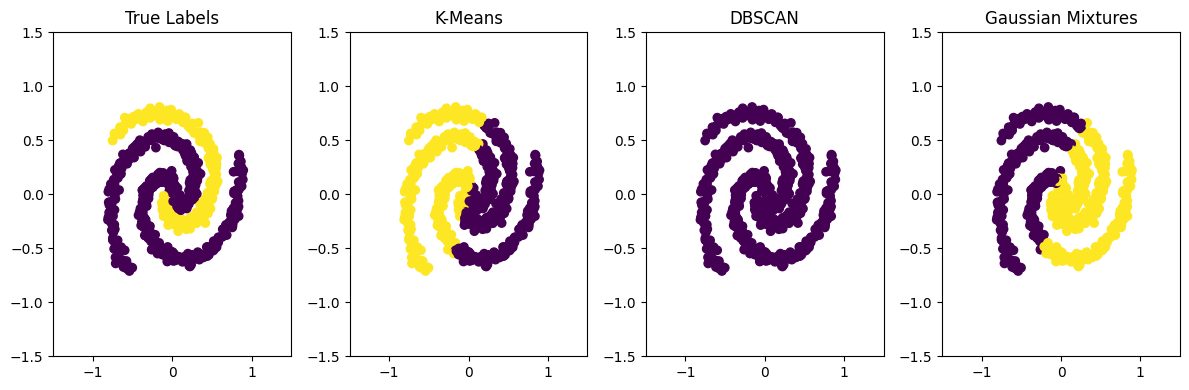

In [ ]:
def C_data(xlim1 = -1.2, xlim2 = 1.2, ylim1 = -1.2, ylim2 = 1.2):

  # Определение количества точек на линии
  num_points = 300

  # Создание радиального градиента для определения цвета точек
  radius = np.linspace(0, 1, num_points)
  colors = plt.cm.viridis(radius)

  # Создание спиральных линий
  theta = np.linspace(0, 2 * np.pi, num_points)  # задаём диапазон углов
  x = radius * np.cos(theta)
  y = radius * np.sin(theta)

  # Создаем линии так, чтобы они не доходили до центра
  x = x[15:270]
  y = y[15:270]
  x_neg = -x[15:270]
  y_neg = -y[15:270]
  x_rot = y[15:270]
  y_rot = -x[15:270]

  # Поворачиваем линии
  angle = np.pi / 3  # Угол поворота (60 градусов)
  x_rot_1 = x * np.cos(angle) - y * np.sin(angle)
  y_rot_1 = x * np.sin(angle) + y * np.cos(angle)

  # Добавляем небольшой случайный шум к координатам
  noise_scale = 0.03  # масштаб шума
  x_rot_1 += np.random.normal(0, noise_scale, size=len(x_rot_1))
  y_rot_1 += np.random.normal(0, noise_scale, size=len(y_rot_1))
  x_neg += np.random.normal(0, noise_scale, size=len(x_neg))
  y_neg += np.random.normal(0, noise_scale, size=len(y_neg))
  x_rot += np.random.normal(0, noise_scale, size=len(x_rot))
  y_rot += np.random.normal(0, noise_scale, size=len(y_rot))

  # Объединяем данные в один массив
  data = np.vstack((np.column_stack((x_rot_1, y_rot_1)),
                    np.column_stack((x_neg, y_neg)),
                    np.column_stack((x_rot, y_rot))))

  # Создаем метки для каждой точки (истинное разбиение на кластеры)
  labels_true = np.concatenate((np.zeros(len(x_rot_1)),
                               np.ones(len(x_neg)),
                               np.zeros(len(x_rot))))

  return data, labels_true


data, labels_true = C_data()

# K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
labels_kmeans = kmeans.fit_predict(data)
rand_index_kmeans = rand_score(labels_true, labels_kmeans)
print(f"K-Means: Rand Index = {rand_index_kmeans:.4f}")

 # DBScan
dbscan = DBSCAN(eps=0.15, min_samples=5)
labels_dbscan = dbscan.fit_predict(data)
rand_index_dbscan = rand_score(labels_true, labels_dbscan)
print(f"DBScan: Rand Index = {rand_index_dbscan:.4f}")

# Gaussian Mixtures
gmm = GaussianMixture(n_components=2, random_state=0)
labels_gmm = gmm.fit_predict(data)
rand_index_gmm = rand_score(labels_true, labels_gmm)
print(f"Gaussian Mixtures: Rand Index = {rand_index_gmm:.4f}")


# Визуализация результатов

plt.figure(figsize=(12, 4))

# True Labels
plt.subplot(1, 4, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_true, cmap='viridis')
plt.title('True Labels')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# K-Means
plt.subplot(1, 4, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# DBSCAN
plt.subplot(1, 4, 3)
plt.scatter(data[:, 0], data[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Gaussian Mixtures
plt.subplot(1, 4, 4)
plt.scatter(data[:, 0], data[:, 1], c=labels_gmm, cmap='viridis')
plt.title('Gaussian Mixtures')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()